In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [2]:
# Load dataset
df_bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')

# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()

Shape of dataframe: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


In [3]:
df_bank['deposit'].value_counts() # variable target 

no     5873
yes    5289
Name: deposit, dtype: int64

In [4]:
df_bank.isnull().sum() # vérifier s'il existe des valeurs nulles

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
#Scale Numeric Data
#Next up, we will scale our numerical data to avoid outlier presence that can significantly affect our model. 
#Using StandardScaler() function from sklearn we can scale each our columns that contains numerical data. 



from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank_ready[num_cols])

df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,-0.186785,-0.481184,-0.36326,unknown,yes


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = df_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)
df_bank_ready.head(10)

Shape of dataframe: (11162, 51)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,1
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.064473,-0.473926,-1.265746,-0.186785,-0.481184,-0.36326,1
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.239676,-0.216583,-1.146986,-0.554168,-0.481184,-0.36326,1
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.575448,-0.304948,-1.146986,-0.554168,-0.481184,-0.36326,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.355243,-0.473616,-1.146986,-0.554168,-0.481184,-0.36326,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.110730,1.104237,-1.146986,0.180598,-0.481184,-0.36326,1


In [7]:
# Select Features
feature = df_bank_ready.drop('deposit', axis=1)

# Select Target
target = df_bank_ready['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


In [8]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    #Accuracy: the proportion of true results among the total number of cases examined
    acc = metrics.accuracy_score(y_test, y_pred)
    #Precision: used to calculate how much proportion of all data that was predicted positive was actually positive
    prec = metrics.precision_score(y_test, y_pred)
    #Recall: used to calculate how much proportion of actual positives is correctly classified
    rec = metrics.recall_score(y_test, y_pred)
    #F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall ,F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    f1 = metrics.f1_score(y_test, y_pred)
    #Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
    # K=(po−pe)/(1−pe) 
    #used to measure inter-rater reliability 
    #where  po  is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio
    #   and  pe  is the expected agreement when both annotators assign labels randomly.  pe  is estimated using a per-annotator 
    #empirical prior over the class labels.



    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    # Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [9]:
#####Decision TREE

from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6, min_samples_split=4,random_state=0) #“random” to choose the best random split
# min_samples_split the minimum number of samples required to split
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=0,
                       splitter='random')

In [10]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.6892073443797582
Precision: 0.7493333333333333
Recall: 0.5262172284644194
F1 Score: 0.6182618261826183
Cohens Kappa Score: 0.3694231024327045
Area Under Curve: 0.7411434473003167
Confusion Matrix:
 [[977 188]
 [506 562]]


In [11]:
##########Random Forest


from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(n_estimators =100, max_depth=12, 
                            random_state= 50) #criterion = gini par defaut
rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=12, random_state=50)

In [12]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])


Accuracy: 0.7218987908643081
Precision: 0.7742331288343558
Recall: 0.5908239700374532
F1 Score: 0.6702071163037706
Cohens Kappa Score: 0.437195680504761
Area Under Curve: 0.7859108517786242
Confusion Matrix:
 [[981 184]
 [437 631]]


In [13]:
####LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression( C = 0.1,max_iter=100) # C :Inverse of regularization strength, default=1.0
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [14]:
# Evaluate Model
nb_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])



Accuracy: 0.7048813255709807
Precision: 0.7478787878787879
Recall: 0.5777153558052435
F1 Score: 0.6518753301637612
Cohens Kappa Score: 0.40299180199840234
Area Under Curve: 0.7661683625082382
Confusion Matrix:
 [[957 208]
 [451 617]]


In [15]:
###SVM 
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=70,gamma=0.001  ,probability=True).fit(X_train,y_train) # kernel type :kernel , C : Regularization parameter, 
# probability estimates :This must be enabled before using fit

predictionsvm = svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsvm))

# macro average (averaging the unweighted mean per label)
#weighted average (averaging the support-weighted mean per label)


              precision    recall  f1-score   support

           0       0.66      0.88      0.75      1165
           1       0.79      0.50      0.61      1068

    accuracy                           0.70      2233
   macro avg       0.72      0.69      0.68      2233
weighted avg       0.72      0.70      0.68      2233



In [16]:
# Evaluate Model
SVM_eval = evaluate_model(svc, X_test, y_test)

# Print result
#print('Accuracy:', SVM_eval['acc'])
print('Precision:', SVM_eval['prec'])
print('Recall:', SVM_eval['rec'])
print('F1 Score:', SVM_eval['f1'])
print('Cohens Kappa Score:', SVM_eval['kappa'])
print('Area Under Curve:',SVM_eval['auc'])
print('Confusion Matrix:\n',SVM_eval['cm'])

Precision: 0.7864506627393225
Recall: 0.5
F1 Score: 0.611333714939897
Cohens Kappa Score: 0.3813185337945336
Area Under Curve: 0.7712140939705197
Confusion Matrix:
 [[1020  145]
 [ 534  534]]


In [17]:
#####KNN
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(n_neighbors=4,weights='uniform') #n_neighbors : Number of neighbors to use , weights='uniform': uniform weights:
# All points in each neighborhood are weighted equally.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [18]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.6730855351545006
Precision: 0.7442196531791907
Recall: 0.48220973782771537
F1 Score: 0.5852272727272728
Cohens Kappa Score: 0.33519116073292965
Area Under Curve: 0.7276944591792449
Confusion Matrix:
 [[988 177]
 [553 515]]


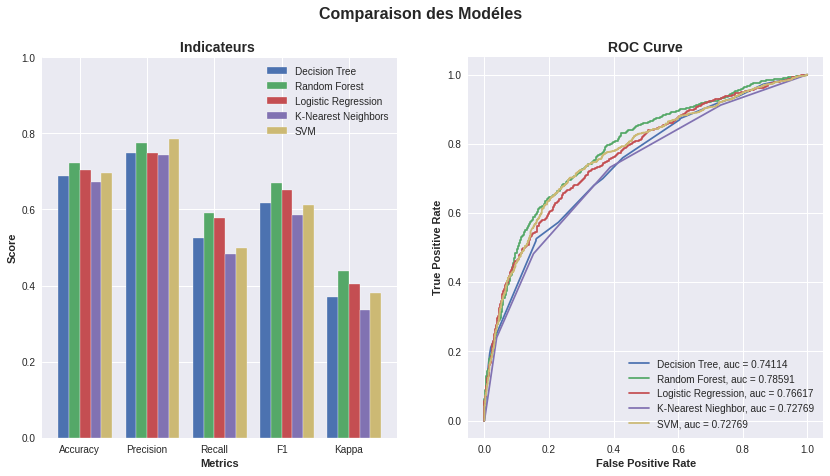

In [19]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparaison des Modéles', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.16
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
svm_score=[SVM_eval['acc'],SVM_eval['prec'],SVM_eval['rec'],SVM_eval['f1'],SVM_eval['kappa']]
## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5=[x+ barWidth for x in r4]
## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, svm_score, width=barWidth, edgecolor='white', label='SVM')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Indicateurs ', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(SVM_eval['fpr'], SVM_eval['tpr'], label='SVM, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
# summarize class distribution
#A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values

print("before oversampling: ",Counter(X_train))
print("After oversampling: ",Counter(X_train_SMOTE))
print("before oversampling: ",Counter(y_train))
print("After oversampling: ",Counter(y_train_SMOTE))

before oversampling:  Counter({'job_admin.': 1, 'job_blue-collar': 1, 'job_entrepreneur': 1, 'job_housemaid': 1, 'job_management': 1, 'job_retired': 1, 'job_self-employed': 1, 'job_services': 1, 'job_student': 1, 'job_technician': 1, 'job_unemployed': 1, 'job_unknown': 1, 'marital_divorced': 1, 'marital_married': 1, 'marital_single': 1, 'education_primary': 1, 'education_secondary': 1, 'education_tertiary': 1, 'education_unknown': 1, 'default_no': 1, 'default_yes': 1, 'housing_no': 1, 'housing_yes': 1, 'loan_no': 1, 'loan_yes': 1, 'contact_cellular': 1, 'contact_telephone': 1, 'contact_unknown': 1, 'month_apr': 1, 'month_aug': 1, 'month_dec': 1, 'month_feb': 1, 'month_jan': 1, 'month_jul': 1, 'month_jun': 1, 'month_mar': 1, 'month_may': 1, 'month_nov': 1, 'month_oct': 1, 'month_sep': 1, 'poutcome_failure': 1, 'poutcome_other': 1, 'poutcome_success': 1, 'poutcome_unknown': 1, 'age': 1, 'balance': 1, 'day': 1, 'campaign': 1, 'pdays': 1, 'previous': 1})
After oversampling:  Counter({'job_

In [21]:
##########Random Forest


from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(n_estimators =100, max_depth=12, 
                            random_state= 50)
rf.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(max_depth=12, random_state=50)

In [22]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

#before Oversampling with smote
#Accuracy: 0.7218987908643081
#Precision: 0.7742331288343558
#Recall: 0.5908239700374532              
#F1 Score: 0.6702071163037706
#Cohens Kappa Score: 0.437195680504761
#Area Under Curve: 0.7859108517786242
#Confusion Matrix:
# [[981 184]
# [437 631]]

Accuracy: 0.7232422749664129
Precision: 0.7551020408163265
Recall: 0.6235955056179775
F1 Score: 0.6830769230769231
Cohens Kappa Score: 0.44138798687498937
Area Under Curve: 0.7843789683496487
Confusion Matrix:
 [[949 216]
 [402 666]]


In [23]:


# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test)

print("ROC AUC score after oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))
print('Area Under Curve before oversampled smote',SVM_eval['auc'])

ROC AUC score after oversampled SMOTE data:  0.7317355451608236
Area Under Curve before oversampled smote 0.7712140939705197


In [24]:
###SVM 
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=70, gamma=0.001,probability=True).fit(X_train_SMOTE,y_train_SMOTE)
predictionsvm = svc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictionsvm))

              precision    recall  f1-score   support

           0       0.68      0.85      0.75      1165
           1       0.77      0.56      0.65      1068

    accuracy                           0.71      2233
   macro avg       0.72      0.70      0.70      2233
weighted avg       0.72      0.71      0.70      2233



In [25]:
# Evaluate Model
SVM_eval = evaluate_model(svc, X_test,y_test)

# Print result
#print('Accuracy:', SVM_eval['acc'])
print('Precision:', SVM_eval['prec'])
print('Recall:', SVM_eval['rec'])
print('F1 Score:', SVM_eval['f1'])
print('Cohens Kappa Score:', SVM_eval['kappa'])
print('Area Under Curve:',SVM_eval['auc'])
print('Confusion Matrix:\n',SVM_eval['cm'])

#before
#Precision: 0.7864506627393225
#Recall: 0.5
#F1 Score: 0.611333714939897
#Cohens Kappa Score: 0.3813185337945336
#Area Under Curve: 0.7712253459999037
#Confusion Matrix:
# [[1020  145]
# [ 534  534]]

Precision: 0.7713178294573644
Recall: 0.5589887640449438
F1 Score: 0.6482084690553745
Cohens Kappa Score: 0.41177647096127434
Area Under Curve: 0.7710690231631062
Confusion Matrix:
 [[988 177]
 [471 597]]


In [26]:
####LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression( C = 0.1,max_iter=100)
logreg.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression(C=0.1)

In [27]:
# Evaluate Model

nb_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])


#before
#Accuracy: 0.7048813255709807
#Precision: 0.7478787878787879
#Recall: 0.5777153558052435
#F1 Score: 0.6518753301637612
#Cohens Kappa Score: 0.40299180199840234
#Area Under Curve: 0.7661683625082382
#Confusion Matrix:
# [[957 208]
# [451 617]]

Accuracy: 0.7039856695029109
Precision: 0.7190527448869752
Recall: 0.6254681647940075
F1 Score: 0.6690035052578868
Cohens Kappa Score: 0.4036207497746426
Area Under Curve: 0.7660068155149411
Confusion Matrix:
 [[904 261]
 [400 668]]
